In [18]:
import pandas as pd
import yaml 
import os
import dvc.api

In [19]:
df_all = pd.read_json('../../models/multitask_multimodal_multilingual/version_9/clm-epoch=1-step=2600--wish_labelled_query_offshore_test--test.json', 
    lines=True)
df_leaf = pd.read_json('../../models/multitask_multimodal_multilingual/version_9/clm-epoch=1-step=2600--wish_labelled_query_offshore_test--test--leaf.json', 
    lines=True)

In [20]:
data_config = yaml.safe_load(open('../../datasets/multimodal_multitask/wish_labelled_query_offshore_test.yaml', 'r'))
df_query = pd.read_json(dvc.api.get_url(**data_config['test'][0]), lines=True)

In [21]:
df_query['allnode_pred'] = df_all.sort_values(['batch_indices', 'rank_indices']).groupby('batch_indices').agg({
    'prediction_decoded': lambda x: [i for i in x]
})['prediction_decoded']

df_query['allnode_prob'] = df_all.sort_values(['batch_indices', 'rank_indices']).groupby('batch_indices').agg({
    'prob': lambda x: [i for i in x]
})['prob']

df_query['leafnode_pred'] = df_leaf.sort_values(['batch_indices', 'rank_indices']).groupby('batch_indices').agg({
    'prediction_decoded': lambda x: [i for i in x]
})['prediction_decoded']

df_query['leafnode_prob'] = df_leaf.sort_values(['batch_indices', 'rank_indices']).groupby('batch_indices').agg({
    'prob': lambda x: [i for i in x]
})['prob']

In [34]:
df_query[df_query.allnode_pred.apply(lambda x: x[0]) != df_query.leafnode_pred.apply(lambda x: x[0])][[ 
    'sample_method', 'gmv', 'query', 'query_classification_lists', 'allnode_pred', 'allnode_prob', 'leafnode_pred', 'leafnode_prob'
]].sample(2).to_dict('records')

[{'sample_method': 'uniform',
  'gmv': 867.1312255859,
  'query': 'toyota camry 2019 accessory',
  'query_classification_lists': ['Automobiles & Motorcycles > Car Lights > Car Headlight Bulbs (LED)',
   'Automobiles & Motorcycles > Exterior Accessories > Car Covers',
   'Automobiles & Motorcycles > Interior Accessories > Automobiles Seat Covers'],
  'allnode_pred': ['automobiles & motorcycles > interior accessories',
   'automobiles & motorcycles > auto replacement parts',
   'automobiles & motorcycles > exterior accessories'],
  'allnode_prob': [0.434425622224807,
   0.25307852029800404,
   0.21197882294654802],
  'leafnode_pred': ['automobiles & motorcycles > interior accessories > interior mouldings',
   'automobiles & motorcycles > interior accessories > floor mats',
   'automobiles & motorcycles > auto replacement parts > exterior parts > exterior door handles'],
  'leafnode_prob': [0.015315063297748002,
   0.013075442053377,
   0.007432257290929001]},
 {'sample_method': 'head',
 

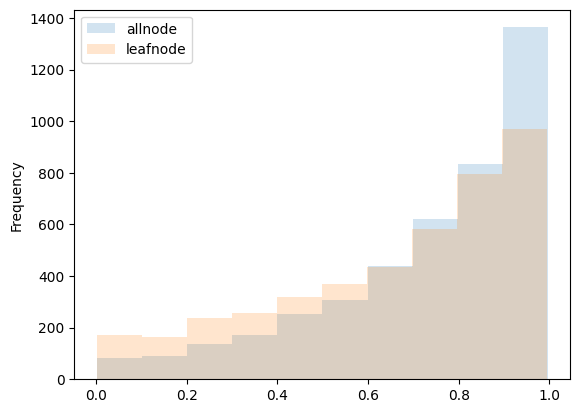

In [31]:
df_query.allnode_prob.apply(sum).plot.hist(label='allnode', alpha=.2)
df_query.leafnode_prob.apply(sum).plot.hist(label='leafnode', alpha=.2)
import matplotlib.pyplot as plt
plt.legend()

In [33]:
df_query.allnode_prob.apply(sum).mean(), df_query.leafnode_prob.apply(sum).mean()

(0.732526014944305, 0.6599261522220737)